# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "Weather_Info_Output.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)

lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
    
# Print the city count to confirm sufficient count
len(cities)


576

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# OpenWeatherMap API Key
api_key = api_keys.api_key

# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=" + api_key 

# Create empty lists to append the API data into lists 
CityName = []
Cloudiness = []
Country = []
Date_Info = []
Humidity = []
lat = []
lon = []
MaxT = []
MaxW = []
x = 1
y = 1

# Record each API Call 
print(f"Beginning Data Retrieval")
print(f"------------------------")

#Start generating Weather Info data 
for city in cities:  
    
    # We try for the possibility that a city does not exist and we account for it.  
    try: 
        response = requests.get(f"{url}&q={city}").json() 
        CityName.append(response["name"])
        Cloudiness.append(response["clouds"]["all"])
        Country.append(response["sys"]["country"])
        Date_Info.append(response["dt"])
        Humidity.append(response["main"]["humidity"])
        lat.append(response["coord"]["lat"])
        lon.append(response["coord"]["lon"])
        MaxT.append(response["main"]["temp_max"])
        MaxW.append(response["wind"]["speed"])
        city_name = response["name"]
        print(f"Processing Record {x} Set of {y}| {city_name}")
        
        # Increase Record count 
        x += 1
        if x > 50: # start new Record
            x = 1
            y += 1 # increase set count
        if x == 1 and y == 11: # We have 500 Cities, let's exit
            break
        # Adjusting speed of API Calls
        time.sleep(1.5)
        
    # skip if no city found
    except:
        print(f"City of {city_name} not found. Skipping...")
    continue
print(f"-----------------------") 
print(f"Data Retrieval Complete")
print(f"-----------------------")    

Beginning Data Retrieval
------------------------
Processing Record 1 Set of 1| Aksarayskiy
Processing Record 2 Set of 1| New Norfolk
Processing Record 3 Set of 1| Marzuq
Processing Record 4 Set of 1| Rikitea
Processing Record 5 Set of 1| East London
Processing Record 6 Set of 1| Hilo
Processing Record 7 Set of 1| Bandundu
Processing Record 8 Set of 1| Goryachegorsk
Processing Record 9 Set of 1| Vaini
Processing Record 10 Set of 1| Moerai
Processing Record 11 Set of 1| Alofi
Processing Record 12 Set of 1| Umtata
Processing Record 13 Set of 1| Willmar
Processing Record 14 Set of 1| Bakchar
Processing Record 15 Set of 1| Mar del Plata
Processing Record 16 Set of 1| Albany
Processing Record 17 Set of 1| Springdale
Processing Record 18 Set of 1| Bonavista
Processing Record 19 Set of 1| Arraial do Cabo
Processing Record 20 Set of 1| Paracuru
Processing Record 21 Set of 1| Iqaluit
Processing Record 22 Set of 1| Dikson
City of Dikson not found. Skipping...
Processing Record 23 Set of 1| Iskat

Processing Record 37 Set of 4| Saint-Augustin
Processing Record 38 Set of 4| Luwuk
Processing Record 39 Set of 4| Severo-Kurilsk
Processing Record 40 Set of 4| Labuhan
Processing Record 41 Set of 4| Nouadhibou
Processing Record 42 Set of 4| Dwarka
Processing Record 43 Set of 4| Sitka
Processing Record 44 Set of 4| Kysyl-Syr
Processing Record 45 Set of 4| Bethel
Processing Record 46 Set of 4| Hovd
Processing Record 47 Set of 4| Hithadhoo
Processing Record 48 Set of 4| Natal
Processing Record 49 Set of 4| Praia
Processing Record 50 Set of 4| Vardo
Processing Record 1 Set of 5| Mackay
Processing Record 2 Set of 5| Raahe
Processing Record 3 Set of 5| Maldonado
Processing Record 4 Set of 5| Bandarbeyla
City of Bandarbeyla not found. Skipping...
City of Bandarbeyla not found. Skipping...
Processing Record 5 Set of 5| Mana
Processing Record 6 Set of 5| Tuktoyaktuk
Processing Record 7 Set of 5| Kamennomostskoye
Processing Record 8 Set of 5| Inhambane
Processing Record 9 Set of 5| Puteyets
Proc

Processing Record 19 Set of 8| Juneau
Processing Record 20 Set of 8| Lakes Entrance
Processing Record 21 Set of 8| Ust-Kuyga
Processing Record 22 Set of 8| Eskisehir
Processing Record 23 Set of 8| Hasaki
Processing Record 24 Set of 8| Gornopravdinsk
Processing Record 25 Set of 8| Huntsville
Processing Record 26 Set of 8| Haines Junction
Processing Record 27 Set of 8| Kenai
Processing Record 28 Set of 8| Mtsamboro
Processing Record 29 Set of 8| Nicolas Bravo
Processing Record 30 Set of 8| Basco
Processing Record 31 Set of 8| Kamiiso
Processing Record 32 Set of 8| Bubaque
Processing Record 33 Set of 8| Octeville
Processing Record 34 Set of 8| Santa Isabel do Rio Negro
Processing Record 35 Set of 8| Grand Gaube
Processing Record 36 Set of 8| Nelson Bay
Processing Record 37 Set of 8| Dickinson
Processing Record 38 Set of 8| Hambantota
Processing Record 39 Set of 8| Pringsewu
Processing Record 40 Set of 8| Kandrian
Processing Record 41 Set of 8| Sobolevo
Processing Record 42 Set of 8| Xians

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
weather_dict = {
    "city": CityName,
    "Cloudiness": Cloudiness,
    "Country": Country,
    "Date": Date_Info,
    "Humidity": Humidity,
    "lat": lat,
    "lon": lon,
    "Max Temp": MaxT,
    "Wind Speed": MaxW
}

weather_info = pd.DataFrame(weather_dict)

# Make sure consistency in each data exist with count 
weather_info.count()


city          500
Cloudiness    500
Country       500
Date          500
Humidity      500
lat           500
lon           500
Max Temp      500
Wind Speed    500
dtype: int64

In [5]:
# Save Data to csv
weather_info.to_csv(output_data_file)

weather_info.head()


,city,Cloudiness,Country,Date,Humidity,lat,lon,Max Temp,Wind Speed
0,Aksarayskiy,0,RU,1570268215,28,46.79,48.01,23.00,8.00
1,New Norfolk,40,AU,1570268217,62,-42.78,147.06,12.00,3.60
2,Marzuq,12,YE,1570268219,15,14.40,46.47,31.31,6.82
3,Rikitea,100,PF,1570268221,81,-23.12,-134.97,21.01,9.86
4,East London,20,ZA,1570268222,57,-33.02,27.91,24.00,6.70


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

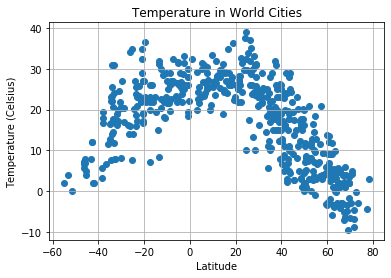

In [8]:
# Build a scatter plot for each data type
plt.scatter(weather_info["lat"], weather_info["Max Temp"], marker="o")

# Incorporate the other graph properties
plt.title("Temperature in World Cities")
plt.ylabel("Temperature (Celsius)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("TemperatureInWorldCities.png")

# Show plot
plt.show()


#### Latitude vs. Humidity Plot

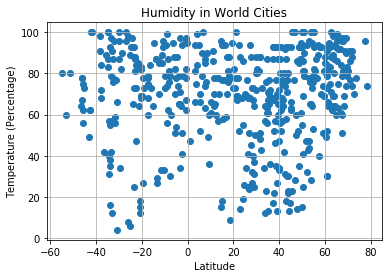

In [9]:
# Build a scatter plot for each data type
plt.scatter(weather_info["lat"], weather_info["Humidity"], marker="o")

# Incorporate the other graph properties
plt.title("Humidity in World Cities")
plt.ylabel("Temperature (Percentage)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("HumidityInWorldCities.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

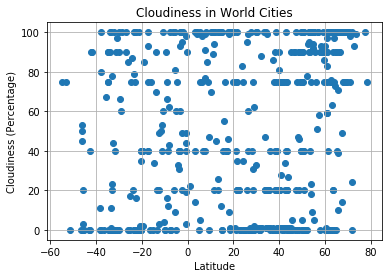

In [10]:
# Build a scatter plot for each data type
plt.scatter(weather_info["lat"], weather_info["Cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title("Cloudiness in World Cities")
plt.ylabel("Cloudiness (Percentage)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("CloudinessInWorldCities.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

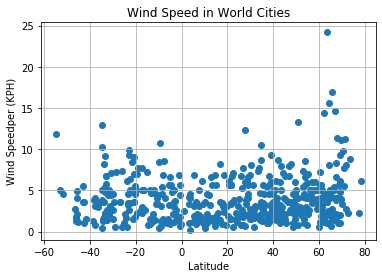

In [11]:
# Build a scatter plot for each data type
plt.scatter(weather_info["lat"], weather_info["Wind Speed"], marker="o")

# Incorporate the other graph properties
plt.title("Wind Speed in World Cities")
plt.ylabel("Wind Speedper (KPH)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("WindSpeedInWorldCities.png")

# Show plot
plt.show()